In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

2022-10-13 13:30:57.561199: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# reading in data
# I should double check this is the case across the images...
img_height = 355
img_width = 355

train_dat, val_dat = tf.keras.utils.image_dataset_from_directory(directory = "./data/char_images/", 
shuffle = True, seed = 777, validation_split=0.50, subset = "both",
image_size = (img_height, img_width))

Found 255 files belonging to 2 classes.
Using 128 files for training.
Using 127 files for validation.


2022-10-13 13:31:02.789567: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


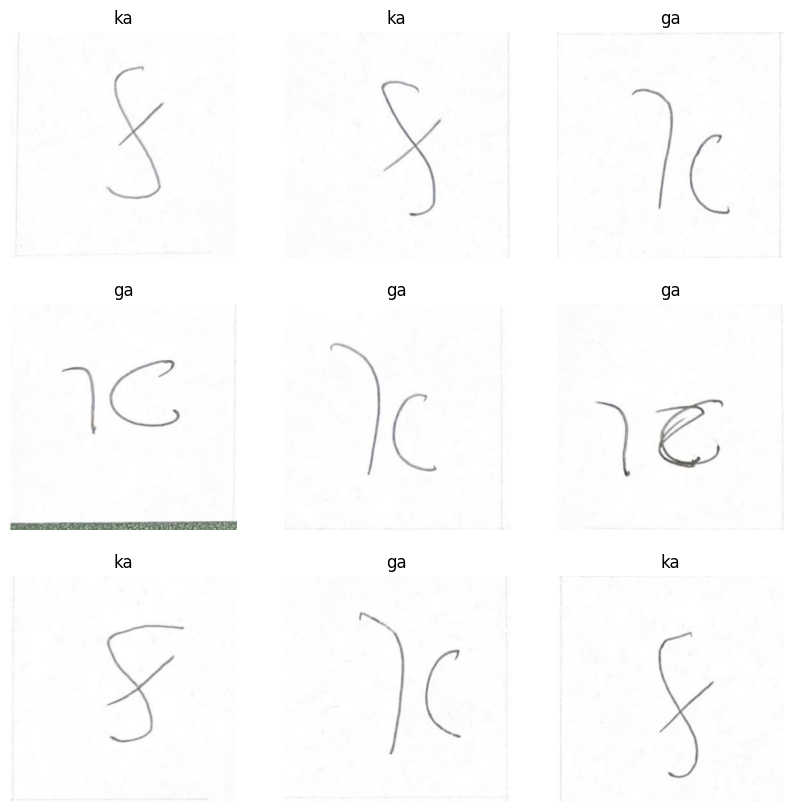

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dat.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_dat.class_names[labels[i]])
    plt.axis("off")

In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_dat = train_dat.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dat = val_dat.cache().prefetch(buffer_size=AUTOTUNE)


In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)



In [6]:
img_inputs = tf.keras.Input(shape=(img_height, img_width, 3))
normd = normalization_layer(img_inputs)
conv1 = tf.keras.layers.Conv2D(16, 3, padding = "same", activation = "relu")(normd)
x = tf.keras.layers.MaxPooling2D()(conv1)
x = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs=img_inputs, outputs=output, name="gujarati_model")

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
epochs=20
history = model.fit(
  train_dat,
  validation_data=val_dat,
  epochs=epochs
)

Epoch 1/20
4/4 [==============================] - 4s 773ms/step - loss: 13.2879 - accuracy: 0.5859 - val_loss: 27.9642 - val_accuracy: 0.4331
Epoch 2/20
4/4 [==============================] - 3s 679ms/step - loss: 20.7471 - accuracy: 0.3672 - val_loss: 10.1030 - val_accuracy: 0.5669
Epoch 3/20
4/4 [==============================] - 3s 676ms/step - loss: 11.4841 - accuracy: 0.6328 - val_loss: 11.3993 - val_accuracy: 0.5669
Epoch 4/20
4/4 [==============================] - 3s 699ms/step - loss: 4.9082 - accuracy: 0.6328 - val_loss: 4.0718 - val_accuracy: 0.4331
Epoch 5/20
4/4 [==============================] - 2s 672ms/step - loss: 4.7906 - accuracy: 0.3672 - val_loss: 1.5319 - val_accuracy: 0.4331
Epoch 6/20
4/4 [==============================] - 2s 667ms/step - loss: 1.4029 - accuracy: 0.5703 - val_loss: 2.3304 - val_accuracy: 0.5669
Epoch 7/20
4/4 [==============================] - 2s 657ms/step - loss: 1.7539 - accuracy: 0.6328 - val_loss: 1.4226 - val_accuracy: 0.5669
Epoch 8/20
4/4

In [9]:
model.save("gujarati_classifier")

INFO:tensorflow:Assets written to: gujarati_classifier/assets


INFO:tensorflow:Assets written to: gujarati_classifier/assets
